## Tutorial I – Descriptive measures.

**Data:** _Village level acreage data and crop condition in 4 categories (excellent, good, medium poor), is given for wheat and rice for different talukas in a district_
- 1.1 Express each village acreage as percent geographic area (normalize with geographic area)
- 1.2 Compute range, mean, median, mode, variance, std dev and coefficient of variation of village acreages in a taluka.
- 1.3 Check for any anomalous values in data – outliers. Assume normal distribution, compute 
 and check outliers , if any.
- 1.4 Create histogram and cumulative histograms of data
- 1.5 Find taluka having max and min variability 
- 1.6 Create histograms and cumulative histograms for categorical crop condition data
- 1.7 Compare crop conditions across talukas

## Dependencies
### Python packages

- Scipy
- numpy
- GDAL
- osgeo
- ogr
- scipy.stats
- os

### Tutorials & Refrences

| Tutorial | LINKS |
| ------ | ------ |
| Scipy | https://www.tutorialspoint.com/scipy |

### 1.1 Express each village acreage as percent geographic area (normalize with geographic area).

### 1.2. Compute range, mean, median, mode, variance, std dev and coefficient of variation of village acreages in a taluka.

In [ ]:
from osgeo import gdal
from osgeo import ogr
import numpy as np
import math
from scipy.stats import mode
import os 

def calculateAcreage(crop,filepath):
    print("Analysing",crop,"data!")
    print(filepath)
    dataset = gdal.Open(filepath)
    if dataset:
        band = dataset.GetRasterBand(1)
    else:
        print("Cannot open file:")
        exit()
    

    rast_array = np.array(band.ReadAsArray())
    tcount = 0
    count = 0

    withoutNoData = []

    for row in rast_array:
        for element in row:
            tcount = tcount + 1
            if math.isnan(element) == False and element != 0.0:
                count = count+1
                withoutNoData.append(element)

    minval = min(withoutNoData)
    maxval = max(withoutNoData)
    meanval = np.mean(withoutNoData)
    medianval = np.median(withoutNoData)
    modeval = float(mode(withoutNoData)[0])
    modefreq = int(mode(withoutNoData)[1])
    sdval = np.std(withoutNoData)
    varianceval = np.var(withoutNoData)
    rangeval = maxval - minval
    coefvariation = sdval * 100 / meanval

    print("Min Value:", minval)
    print("Max Value:", maxval)
    print("Mean :", meanval)
    print("Median :", medianval)
    print("Mode :", modeval)
    print("Mode frequency :", modefreq)
    print("Variance :", varianceval)
    print("Standard Deviation :", sdval)
    print("Range :", rangeval)
    print("Coefficient of Variation :", coefvariation)

    area = count * 9/1000000

    print("Total", crop ,"area:", area, "sqkm")
    print("------------------------------------")
    return(area)

shapfile_path = r'C:\Users\dhaval.panchal.ISPL\Downloads\Wheat_Paddy_ahm\Wheat_Paddy_ahm\Dhok_ahm_shpFile'
shpfile = ogr.Open(shapfile_path)
shape = shpfile.GetLayer(0)
feature = shape.GetFeature(0)
villageArea = feature.geometry().GetArea()/1000000

tif_path = r'C:\Users\dhaval.panchal.ISPL\Downloads\Wheat_Paddy_ahm\Wheat_Paddy_ahm\NDVI_Mask'
paddy_tif = r'ndvi_mask_paddy.tif'
wheat_tif = r'ndvi_mask_wheat.tif'

paddyacreage = calculateAcreage("Paddy", os.path.join(tif_path,paddy_tif))
wheatacreage = calculateAcreage("Wheat", os.path.join(tif_path,wheat_tif))

print("Area of village:" , villageArea, "sqkm")
print("------------------------------------")
print("Percentage area of Paddy:", 100 * paddyacreage / villageArea, "%")
print("Percentage area of Wheat:", 100 * wheatacreage / villageArea, "%")

### 1.3. Check for any anomalous values in data – outliers. Assume normal distribution, compute and check outliers , if any.

###  1.4.  Create histogram and cumulative histograms of data and categorical crop condition data.

### 1.6. histogram of conditional data.

In [ ]:
from osgeo import gdal
from osgeo import ogr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode, zscore
import os
import math

filepath = "/home/ispluser/Dimple/Wheat_Paddy_ahm/NDVI_Mask_tiff"
paddy = "ndvi_mask_paddy_zero.tif"
wheat = "ndvi_mask_wheat_zero.tif"
def data(filepath,image_path):
    
    dataset = gdal.Open(os.path.join(filepath,image_path))
    band = dataset.GetRasterBand(1)
    
    rast_array = np.array(band.ReadAsArray())
    tcount = 0
    count = 0
    
    withoutNoData = []
    
    for row in rast_array:
        for element in row:
            tcount = tcount + 1
            if math.isnan(element) == False and element != 0.0:
                count = count+1
                withoutNoData.append(element)
    return withoutNoData

withoutNoData = data(filepath,wheat)

# find ouotliers using zscore
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    z_score = []
    for y in data_1:
        z_score_= (y - mean_1)/std_1 
        z_score.append(z_score_)
        if np.abs(z_score_) > threshold:
            outliers.append(y)
#    print("Function block")
#    print("Zscore", zscore)
#    print("Outliers",outliers )
    return z_score, outliers

z_score, outliers = detect_outlier(withoutNoData)

# histogram:
def histogram(data):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.hist(data, color='purple')
    
    ax.set(xlabel = 'Pixels', 
           ylabel = 'Frequency',
           title = "Distribution of NDVI Mask Values");
          
histogram(withoutNoData)

# cumulative histograms of data:
def cumulative_histogram(data):
    mu = 200
    sigma = 25
    n_bins = 50
    #x = NDVI_mask_hist
    x = data
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # plot the cumulative histogram
    n, bins, patches = ax.hist(x, n_bins, density=True, histtype='step',
                               cumulative=True, label='Empirical')
    
    # Add a line showing the expected distribution.
    y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
         np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
    y = y.cumsum()
    y /= y[-1]
    
    ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')
    
    # Overlay a reversed cumulative histogram.
    ax.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,
            label='Reversed emp.')
    
    # tidy up the figure
    ax.grid(True)
    ax.legend(loc='right')
    ax.set_title('Cumulative step histograms')
    ax.set_xlabel('pixels')
    ax.set_ylabel('Likelihood of occurrence')
    
    plt.show()
    
cumulative_histogram(withoutNoData)

# group array into categories:
def grouping(data):
    classified = {}
    counts = {'Poor':0,"Medium": 0, "Good": 0, "Excellent": 0}
    for i in range(len(withoutNoData)):
        if 0 < withoutNoData[i] <= 0.25:
            classified[withoutNoData[i]] = 'Poor';
            counts['Poor'] += 1
        elif 0.26 < withoutNoData[i] <= 0.50:
            classified[withoutNoData[i]] = 'Medium';
            counts['Medium'] += 1
        elif 0.51 < withoutNoData[i] <= 0.75: 
            classified[withoutNoData[i]] = 'Good';
            counts['Good'] += 1
        else:
            classified[withoutNoData[i]] = 'Excellent'
            counts['Excellent'] += 1
    return classified,counts

categorized, count_dict = grouping(withoutNoData)

#histogram of conditional data:
plt.bar(count_dict.keys(),count_dict.values())

### 1.5 Find taluka having max and min variability.

### 1.7 Compare crop conditions across talukas.


In [ ]:
def compare_taluka(shapefile_path_list, imagefile_path_list):
    acreage = []
    variability = []
    for i in range(len(shapefile_path_list)):
        shpfile = ogr.Open(shapefile_path_list[i])
        shape = shpfile.GetLayer(0)
        feature = shape.GetFeature(0)
        talukArea = feature.geometry().GetArea()/1000000
        variance, cropAcreage = calculateAcreage("Wheat", imagefile_path_list[i])
        acreage.append(cropAcreage)
        variability.append(variance)
    max_val , min_val = np.argmax(variability), np.argmin(variability)
    min_region_name  = imagefile_path_list[min_val].split('/')[-1].split('.')[0].split('_')[0]
    max_region_name = imagefile_path_list[max_val].split('/')[-1].split('.')[0].split('_')[0]
    return min_region_name , max_region_name
        
shape_list = ['shape file path']
image_list = ['shape file path']


minimum_region , maximum_region = compare_taluka(shape_list, image_list)
print("The Taluka with minimum variability is {}".format(minimum_region))
print("The Taluka with maximum variability is {}".format(maximum_region))

## Tutorial II – Data Visualization

**Data:** _village level acreage and condition data in taluka for 2 years_
- 2.1 village level acreage and condition data in taluka for 2 years.
- 2.2 Prepare bar and column charts for both years and observe changes in acreage and condition pattern.
- 2.3 Prepare a dashboard showing acreages change (in % of geographic area) and crop condition  in both years.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

condition_data = pd.read_csv('./gdrive/My Drive/ColabNotebooks/condition_chart.csv')

condition_data.head()

# column chart for acreage:
condition_data[:].plot(x='village',y=['Acreage(2017-2018)', 'Acreage(2018-2019)'],figsize=(20,15),grid=True, kind = 'bar')

# bar chart for acreage:
condition_data[:].plot(x='village',y=['Acreage(2017-2018)', 'Acreage(2018-2019)'],figsize=(20,25),grid=True, kind = 'bar')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

ax = sns.countplot(x="Condition(2017-2018)", hue="Condition(2017-2018)", data=condition_data)

ax = sns.countplot(x="Condition(2018-2019)", hue="Condition(2018-2019)", data=condition_data)

ax = sns.countplot(x="Condition(2017-2018)",data=condition_data)

ax = sns.countplot(x="Condition(2018-2019)",data=condition_data)

## Tutorial III Linear regression

**Data:** _wheat and rice yield data for a district in Gujarat for 20 or more years corresponding Rainfall and temperature data_
- 3.1 Study scatter-plots of rainfall vs yield for rice and temp vs yield for wheat
- 3.2 Prepare weekly, fortnightly rainfall and temp averages for different critical growth stages of wheat and rice.
- 3.3 Perform MLR on the datasets and interpret regression coefficients, their significance, t-test, F-test.
- 3.4 Use 75 % of data to develop regression model and predict yields for the rest 25% of the data,Study the errors and model performance in terms of mean absolute percentage error.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./gdrive/My Drive/ColabNotebooks/Tutorial-3.csv")

df.plot()

import seaborn as sns
sns.lmplot(x='Rainfall', y='Yield (Tonnes/Hectare) ( RicE)', fit_reg=True, data=df);

sns.lmplot(x='Temperature', y='Yield (Tonnes/Hectare) ( WHEAT)', fit_reg=True, data=df);

"""MLR regression"""

# MLR:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

ml  = pd.read_csv("./gdrive/My Drive/ColabNotebooks/Tutorial-3.csv",   usecols = [2,3,4])#, unpack = True)

x = np.column_stack((ml["Rainfall"], ml["Temperature"]))
y = ml["Yield (Tonnes/Hectare) ( WHEAT)"]
# print("y",y)
# print("x", x)
# print("w", z)


X = np.column_stack((np.ones(len(x)),x))
X = np.matrix(X)
Y = np.row_stack(y)
#print(Y)


XtX = (np.transpose(X)) * X
# print("XtX:",XtX)

XtY = (np.transpose(X)) * Y
# print("XtY:",XtY)


XtX_inv = (XtX).I
# print("xtx_inv:",XtX_inv)

B = XtX_inv * XtY
B = np.matrix((B))
# print("B:",B)

# n = 8
# m = 5
# S = B[0] + ((B[1])*x) + ((B[2])*m)
# print("S:",S)

Ycap = X * B
# print("ycap:",Ycap)
Ycap = np.matrix((Ycap))

error = Y - Ycap
# print("error:",error)

rmse = np.sqrt(mean_squared_error(Y,Ycap))
r2 = r2_score(Y,Ycap)

print("RMSE",rmse)
print("R2", r2)

"""Calculate Mean-absolute percentage error"""

# https://stats.stackexchange.com/questions/58391/mean-absolute-percentage-error-mape-in-scikit-learn
# from sklearn.utils import check_arrays
def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE = mean_absolute_percentage_error(Y,Ycap)
print("MAPE", MAPE)

# https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
# t-test
from scipy import stats
t2, p2 = stats.ttest_ind(X,Y)
print("t-test", t2)

# https://stackoverflow.com/questions/28145938/f-test-with-p-value-in-python
# f-test:
d1 = ml["Yield (Tonnes/Hectare) ( WHEAT)"]
d2 = ml["Temperature"]
import statistics as stats
import scipy.stats as ss
def Ftest_pvalue(d1,d2):
    """docstring for Ftest_pvalue"""
    df1 = len(d1) - 1
    df2 = len(d2) - 1
    F = stats.variance(d1) / stats.variance(d2)
    single_tailed_pval = ss.f.cdf(F,df1,df2)
    double_tailed_pval = single_tailed_pval * 2
    return double_tailed_pval
  
print("F-test value:",Ftest_pvalue( d1,d2))

## Tutorial IV – Time series analysis

**Data:** _FAO India level wheat and rice data (1961-2017), n=56_
- 4.1 Plot time series for both crops.
- 4.2 Check for trend, seasonality in data.
- 4.5 If data is stationary, use moving average and smoothing methods for forecasting. 


### 4.1 Plot time series for both crops.

### 4.2 Check for trends,seasonality in data.

### 4.5 If data is stationary, use moving average and smoothing methods for forecasting.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import matplotlib.pyplot as plt
import pandas as pd

wheat_data = pd.read_csv('./gdrive/My Drive/ColabNotebooks/rice_paddy.csv')

wheat_data.info()

wheat_data.head()

# wheat = wheat_data.groupby('Year')

wheat_data = wheat_data.set_index('Year')
wheat_data.index

y = wheat_data['Production in Tonne']

y.plot(figsize=(15, 6))
plt.ylabel("production in tonne")
plt.title("Produciton of wheat from 1961 - 2017")
plt.show()

import seaborn as sns

sns.set()

wheat_data.plot()

"""Trend in Area Harvested and Production"""

area = wheat_data[['Area harvested']]
area.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Area harvested")
plt.show()

production = wheat_data[['Production in Tonne']]
production.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Production in Tonne")
plt.show()

"""Seasonality in data"""

production.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.show()

area.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# co-relation Linear regression
sns.lmplot(x='Area harvested', y='Yield(hg/ha)', fit_reg=True, data=wheat_data);

#polynomial regression
sns.lmplot(x='Area harvested', y='Yield(hg/ha)', order = 4, fit_reg=True, data=wheat_data);

sns.lmplot(x='Area harvested', y='Production in Tonne', fit_reg=True, data=wheat_data);

sns.lmplot(x='Year Code', y='Production in Tonne', fit_reg=True, data=wheat_data);

# sns.lmplot(x='Year Code', y='Production in Tonne', fit_reg=False, data=wheat_data, hue='Yield(hg/ha)');
# !pip install pyEX



"""Moving Average"""

df=pd.DataFrame(wheat_data)
ts = pd.Series(df["Yield(hg/ha)"].values, index=df["Year Code"])
# print(ts.head(5))
mean_smoothed = ts.rolling(window=5).mean()
# print(mean_smoothed)
###### NEW #########
# mean_smoothed[0]=ts[0]
# mean_smoothed.interpolate(inplace=True)
####################
exp_smoothed = ts.ewm(alpha=0.5).mean()

h1 = ts.head(8)
h2 = mean_smoothed.head(8)
h3 = exp_smoothed.head(8)
k = pd.concat([h1, h2, h3], join='outer', axis=1)
k.columns = ["Actual", "Moving Average", "Exp Smoothing"]
print(k)


plt.figure(figsize=(16,5))
plt.plot(ts, label="Original")
plt.plot(mean_smoothed, label="Moving Average")
plt.plot(exp_smoothed, label="Exponentially Weighted Average")
plt.legend()
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# forecast error using polynomial regression 

# transforming the data to include another axis
x = wheat_data['Area harvested'][:, np.newaxis]
y = wheat_data['Yield(hg/ha)'][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE",rmse)
print("R2",r2)

## Tutorial V – Data Mining

**Data:** _satellite data for a district, village level crop data_
- 5.1 Classify satellite data using k-means clustering algorithm and supervised MXL, and NN classifier and compare classification accuracy.
- 5.2 Use unsupervised clustering methods to cluster village level crop data.

In [ ]:
## Kmeans clustering
import cv2, numpy as np
import gdal,matplotlib.pyplot as plt
import statistics as st
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.metrics import silhouette_score

#%%
k = 4 # number of clusters
## input image
out = gdal.Open('rabi_17_02_2019_v1.img')
out = out.ReadAsArray()
out= np.moveaxis(out,0,-1)
## TODO: Check your results with different bands
## or by taking the weighted average of all the bands
out = out[:,:,3] ##taking only 3channels

x, y = out.shape
image_2d = out.reshape(x*y,1)
image_2d.shape

kmeans_cluster = cluster.KMeans(n_clusters = k)
kmeans_cluster.fit(image_2d)
pred = kmeans_cluster.fit_predict(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_
#%%
# compare your results with the ground truth data
## y_test are the actual label points in the ground truth image
#score = metrics.accuracy_score(y_test,k_means.predict())
#print('Accuracy:{0:f}'.format(score))

plt.figure(1)
plt.subplot(211)
plt.title('Input Image')
plt.imshow(out)
plt.subplot(212)
plt.imshow(np.uint8(cluster_centers[cluster_labels].reshape(x, y)))
plt.title('K-means result')

In [ ]:
## SVM Supervised learning

import gdal
import ogr
from sklearn import metrics
from sklearn import svm
import numpy as np
import pandas as pd
from timeit import default_timer as timer
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt



def rasterizeVector(path_to_vector, cols, rows, geo_transform, projection, n_class, raster):
    lblRaster = np.zeros((rows, cols))
    inputDS = ogr.Open(path_to_vector)
    driver = gdal.GetDriverByName('MEM')
    # Define spatial reference
    for j in range(n_class):
        shpLayer = inputDS.GetLayer(0)
        class_id = j + 1
        rasterDS = driver.Create('', cols, rows, 1, gdal.GDT_UInt16)
        rasterDS.SetGeoTransform(geo_transform)
        rasterDS.SetProjection(projection)
        shpLayer.SetAttributeFilter("Id = " + str(class_id))
        bnd = rasterDS.GetRasterBand(1)
        bnd.FlushCache()
        gdal.RasterizeLayer(rasterDS, [1], shpLayer, burn_values=[class_id])
        arr = bnd.ReadAsArray()
        lblRaster += arr
        rasterDS = None
        save_raster = gdal.GetDriverByName('GTiff').Create(raster, cols, rows, 1, gdal.GDT_UInt16)
        sband = save_raster.GetRasterBand(1)
        sband.WriteArray(lblRaster)
        sband.FlushCache()
    return lblRaster


def createGeotiff(outRaster, data, geo_transform, projection, dtyp, bcount=1):
    # Create a GeoTIFF file with the given data
    driver = gdal.GetDriverByName('GTiff')
    rows, cols, _ = data.shape
    rasterDS = driver.Create(outRaster, cols, rows, bcount, dtyp)
    rasterDS.SetGeoTransform(geo_transform)
    rasterDS.SetProjection(projection)
    for i in range(bcount):
        band = rasterDS.GetRasterBand(i + 1)
        band.WriteArray(data[:, :, i])
        band.FlushCache()
    return 0


def check_accuracy(actual_labels, predicted_labels, label_count):
    error_matrix = np.zeros((label_count, label_count))
    for actual, predicted in zip(actual_labels, predicted_labels):
        error_matrix[int(actual) - 1][int(predicted) - 1] += 1
    return error_matrix


start = timer()

inpRaster = r"Input/Image/1.tif"
outRaster = r"Output/svm/SVM.tif"
out_prob = r"Output/svm/Probability_Map.tif"

# Open raster dataset
rasterDS = gdal.Open(inpRaster, gdal.GA_ReadOnly)
# Get spatial reference
geo_transform = rasterDS.GetGeoTransform()
projection = rasterDS.GetProjectionRef()


# Extract band's data and transform into a numpy array
bandsData = []
for b in range(rasterDS.RasterCount):
    band = rasterDS.GetRasterBand(b + 1)
    band_arr = band.ReadAsArray()
    bandsData.append(band_arr)
bandsData = np.dstack(bandsData)
cols, rows, noBands = bandsData.shape

# Read vector data, and rasterize all the vectors in the given directory into a single labelled raster
shapefile = r"Input/Shapefile/Training_site.shp"
shapefile_test = r"Input/Shapefile/testing.shp"
rasterized_shp = r"Output/svm/Rasterized.tif"
rasterized_shp_test = r"Output/svm/Rasterized_test.tif"
lblRaster = rasterizeVector(shapefile, rows, cols, geo_transform, projection, n_class=6, raster=rasterized_shp)
lblRaster_test = rasterizeVector(shapefile_test,rows,cols,geo_transform,projection,n_class=6,raster=rasterized_shp_test)

print('Vectors Rasterized to Raster!')

# Prepare training data (set of pixels used for training) and labels
isTrain = np.nonzero(lblRaster)
isTest = np.nonzero(lblRaster_test)
trainingLabels = lblRaster[isTrain]
testingLabels = lblRaster_test[isTest]
trainingData = bandsData[isTrain]
testingData = bandsData[isTest]



# Train SVM Classifier
classifier = svm.SVC(C=100,gamma=0.1,kernel='linear',probability=True,random_state=None,shrinking=True,verbose=False)

classifier.fit(trainingData, trainingLabels)

print('Classifier fitting done!')


# Predict class label of unknown pixels
noSamples = rows * cols
flat_pixels = bandsData.reshape((noSamples, noBands))
result = classifier.predict(flat_pixels)
p_vals = classifier.predict_proba(flat_pixels)
predicted_labels = classifier.predict(trainingData)
lbl_cnt = (np.unique(trainingLabels)).size
df = pd.DataFrame(check_accuracy(trainingLabels, predicted_labels, 6))
df.to_csv('Output/svm/CM.csv', index=False)

score_oa = classifier.score(trainingData, trainingLabels)
print('training set OA:', score_oa)
score_oa_test = classifier.score(testingData, testingLabels)
print('testing set OA:', score_oa_test)

predicted_labels_test = classifier.predict(testingData)
test_lbl_cnt = (np.unique(testingLabels)).size

print('Testing Labels: ',np.unique(testingLabels))
print('Predicted Labels: ', np.unique(predicted_labels_test))

df_test = pd.DataFrame(check_accuracy(testingLabels, predicted_labels_test, 6))
df_test.to_csv('Output/svm/CM_test.csv', index=False)

print('Confusion Matrices Created!')

###kappa value=======
kappa_score = cohen_kappa_score(trainingLabels, predicted_labels)
print('kappa value training: ', kappa_score)
kappa_score_test = cohen_kappa_score(testingLabels, predicted_labels_test)
print('kappa value testing: ', kappa_score_test)

b_count = p_vals.shape[1]

classification = result.reshape((cols, rows, 1))
prob_arr = p_vals.reshape((cols, rows, b_count))

# Create a GeoTIFF file with the given data
createGeotiff(outRaster, classification, geo_transform, projection, gdal.GDT_UInt16)
createGeotiff(out_prob, prob_arr, geo_transform, projection, gdal.GDT_Float32, b_count)

print('Classified Tiff Image created!')
img = plt.imread('Output/svm/SVM.tif')
plt.imshow(img)
plt.show()

end = timer()
print('The process took: ', end - start, ' seconds!')

In [ ]:
#Random Forest

import gdal
import ogr
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from timeit import default_timer as timer
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt



def rasterizeVector(path_to_vector, cols, rows, geo_transform, projection, n_class, raster):
    lblRaster = np.zeros((rows, cols))
    inputDS = ogr.Open(path_to_vector)
    driver = gdal.GetDriverByName('MEM')
    # Define spatial reference
    for j in range(n_class):
        shpLayer = inputDS.GetLayer(0)
        class_id = j + 1
        rasterDS = driver.Create('', cols, rows, 1, gdal.GDT_UInt16)
        rasterDS.SetGeoTransform(geo_transform)
        rasterDS.SetProjection(projection)
        shpLayer.SetAttributeFilter("Id = " + str(class_id))
        bnd = rasterDS.GetRasterBand(1)
        bnd.FlushCache()
        gdal.RasterizeLayer(rasterDS, [1], shpLayer, burn_values=[class_id])
        arr = bnd.ReadAsArray()
        lblRaster += arr
        rasterDS = None
        save_raster = gdal.GetDriverByName('GTiff').Create(raster, cols, rows, 1, gdal.GDT_UInt16)
        sband = save_raster.GetRasterBand(1)
        sband.WriteArray(lblRaster)
        sband.FlushCache()
    return lblRaster


def createGeotiff(outRaster, data, geo_transform, projection, dtype, bcount=1):
    # Create a GeoTIFF file with the given data
    driver = gdal.GetDriverByName('GTiff')
    rows, cols, _ = data.shape
    rasterDS = driver.Create(outRaster, cols, rows, bcount, dtyp)
    rasterDS.SetGeoTransform(geo_transform)
    rasterDS.SetProjection(projection)
    for i in range(bcount):
        band = rasterDS.GetRasterBand(i + 1)
        band.WriteArray(data[:, :, i])
        band.FlushCache()
    return 0


def check_accuracy(actual_labels, predicted_labels, label_count):
    error_matrix = np.zeros((label_count, label_count))
    for actual, predicted in zip(actual_labels, predicted_labels):
        error_matrix[int(actual) - 1][int(predicted) - 1] += 1
    return error_matrix


start = timer()

inpRaster = r"Input/Image/1.tif"
outRaster = r"Output/rf/rf.tif"
out_prob = r"Output/rf/Probability_Map.tif"

# Open raster dataset
rasterDS = gdal.Open(inpRaster, gdal.GA_ReadOnly)
# Get spatial reference
geo_transform = rasterDS.GetGeoTransform()
projection = rasterDS.GetProjectionRef()


# Extract band's data and transform into a numpy array
bandsData = []
for b in range(rasterDS.RasterCount):
    band = rasterDS.GetRasterBand(b + 1)
    band_arr = band.ReadAsArray()
    bandsData.append(band_arr)
bandsData = np.dstack(bandsData)
cols, rows, noBands = bandsData.shape

# Read vector data, and rasterize all the vectors in the given directory into a single labelled raster
shapefile = r"Input/Shapefile/Training_site.shp"
shapefile_test = r"Input/Shapefile/testing.shp"
rasterized_shp = r"Output/rf/Rasterized.tif"
rasterized_shp_test = r"Output/rf/Rasterized_test.tif"
lblRaster = rasterizeVector(shapefile, rows, cols, geo_transform, projection, n_class=6, raster=rasterized_shp)
lblRaster_test = rasterizeVector(shapefile_test,rows,cols,geo_transform,projection,n_class=6,raster=rasterized_shp_test)

print('Vectors Rasterized to Raster!')

# Prepare training data (set of pixels used for training) and labels
isTrain = np.nonzero(lblRaster)
isTest = np.nonzero(lblRaster_test)
trainingLabels = lblRaster[isTrain]
testingLabels = lblRaster_test[isTest]
trainingData = bandsData[isTrain]
testingData = bandsData[isTest]

# Train RF Classifier
classifier = RandomForestClassifier(n_jobs=10, n_estimators=100, criterion='gini', oob_score= True, max_features= 2)

classifier.fit(trainingData, trainingLabels)

print('Classifier fitting done!')

# Predict class label of unknown pixels
noSamples = rows * cols
flat_pixels = bandsData.reshape((noSamples, noBands))
result = classifier.predict(flat_pixels)
p_vals = classifier.predict_proba(flat_pixels)
print("OOB Score: ", classifier.oob_score_)
predicted_labels = classifier.predict(trainingData)
lbl_cnt = (np.unique(trainingLabels)).size
df = pd.DataFrame(check_accuracy(trainingLabels, predicted_labels, 6))
df.to_csv('Output/rf/CM.csv', index=False)

score_oa = classifier.score(trainingData, trainingLabels)
print('training set OA:', score_oa)
score_oa_test = classifier.score(testingData, testingLabels)
print('testing set OA:', score_oa_test)

predicted_labels_test = classifier.predict(testingData)
test_lbl_cnt = (np.unique(testingLabels)).size

print('Testing Labels: ',np.unique(testingLabels))
print('Predicted Labels: ', np.unique(predicted_labels_test))

df_test = pd.DataFrame(check_accuracy(testingLabels, predicted_labels_test, 6))
df_test.to_csv('Output/rf/CM_test.csv', index=False)

print('Confusion Matrices Created!')

###kappa value=======
kappa_score = cohen_kappa_score(trainingLabels, predicted_labels)
print('kappa value training: ', kappa_score)
kappa_score_test = cohen_kappa_score(testingLabels, predicted_labels_test)
print('kappa value testing: ', kappa_score_test)

b_count = p_vals.shape[1]

classification = result.reshape((cols, rows, 1))
prob_arr = p_vals.reshape((cols, rows, b_count))

# Create a GeoTIFF file with the given data
createGeotiff(outRaster, classification, geo_transform, projection, gdal.GDT_UInt16)
createGeotiff(out_prob, prob_arr, geo_transform, projection, gdal.GDT_Float32, b_count)

print('Classified Tiff Image created!')


img = plt.imread('Output/rf/rf.tif')
plt.imshow(img)
plt.show()

end = timer()
print('The process took: ', end - start, ' seconds!')

## Tutorial VI – Data Mining

- 6.1 Simple Spreadsheet model of exponential light absorption vs LAI.
- 6.2 Light absorption (R)=R0*exp(-k*LAI).
- 6.3 Given values of R0 and LAI, vary k (extinction coefficient) and study effect on transmission rate.
- 6.4 Sample values of LAI from a normal distribution and repeat exercise.

## Tutorial VII


- Maximize P=207x + 200 y
  Subject to x>=o
  y>=0
  x+y<=150
  x<=60
  30x+15y<=3000
- 7.1 Since this is two variable problem, solve it graphically.
- 7.2 Use simplex method to solve the same.

### 7.1 Since this is two variable problem, solve it graphically.


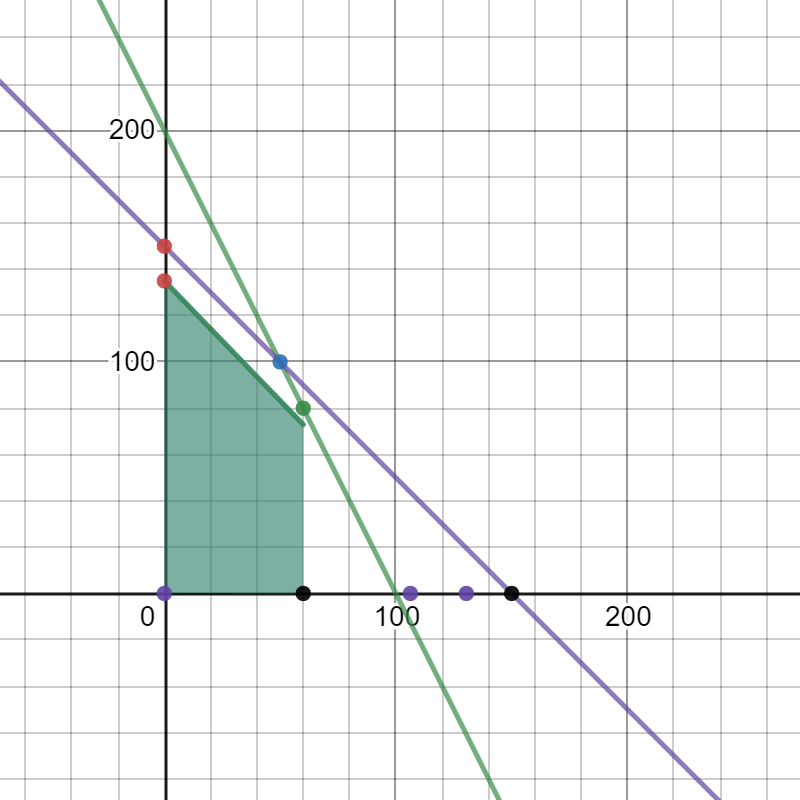

### 7.2 Solve a two variable linear programming problem.

In [ ]:
from scipy.optimize import linprog
import numpy as np
# A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', 
# callback=None, options={'maxiter': 1000, 'disp': False, 'tol': 1e-12, 'bland': False}
c = [-207, -200]
A = [[1, 1], [30, 15]]
b = [150, 3000]
x1_bnds = (0, 60)
x0_bnds = (0, np.inf)

res = linprog(c,A_ub=A, b_ub=b, bounds=(x0_bnds, x1_bnds),method='simplex'
              ,options={'maxiter':1000, 'disp':True, 'tol':1e-12,'bland':False})
print(res)